In [5]:
import logging
import logging.config
import os  # Per comprovar si el fitxer existeix
import time

# Noms dels fitxers
csv_logs_file = 'csv_logs.csv'  # Fitxer per a logs en format CSV

# Comprovar si el fitxer `csv_logs.csv` existeix i està buit
if not os.path.exists(csv_logs_file) or os.path.getsize(csv_logs_file) == 0:
    with open(csv_logs_file, mode='w', newline='') as file:
        file.write("Timestamp,Logger,Level,Message\n")  # Escriure les capçaleres si el fitxer està buit

# Càrrega de la configuració des del fitxer 'logging.conf'
logging.config.fileConfig('logging.conf')

# Crear loggers
logger = logging.getLogger('ejemplofichero')
csv_logger = logging.getLogger('csvlogger')

# Configurar el handler per escriure els logs en el fitxer CSV
csv_handler = logging.FileHandler(csv_logs_file, mode='a')  # Mode 'a' per afegir logs
csv_handler.setLevel(logging.INFO)

# Crear un formatador per a CSV
csv_formatter = logging.Formatter('%(asctime)s,%(name)s,%(levelname)s,%(message)s')
csv_handler.setFormatter(csv_formatter)

# Afegir el handler al logger
csv_logger.addHandler(csv_handler)

# Bucle principal
while True:
    try:
        logger.debug('Missatge de depuració cada dos segons')
        logger.info('Missatge informatiu cada dos segons')
        csv_logger.info('Registre en format CSV cada dos segons')
        time.sleep(2)  # Pausa de 2 segons
    except KeyboardInterrupt:
        logger.error('El programa s\'ha interromput manualment')
        break


2024-11-22 17:39:35,825 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 17:39:35,825 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 17:39:35,827 - csvlogger - INFO - Registre en format CSV cada dos segons
2024-11-22 17:39:37,828 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 17:39:37,828 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 17:39:37,829 - csvlogger - INFO - Registre en format CSV cada dos segons
2024-11-22 17:39:38,193 - ejemplofichero - ERROR - El programa s'ha interromput manualment
2024-11-22 17:39:38,193 - ejemplofichero - ERROR - El programa s'ha interromput manualment


In [ ]:
Exercici 3

Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació
que permetés a un treballador de forma senzilla introduir mitjançant un fitxer json, txt
csv o similar introduir unes dades que escollim i li elaborem una sèrie de gràfiques.
Abans d’això, caldrà informar-se sobre les següents eines, alguna de les quals potser
ja coneixeu.
    

Pandas
    
Funcionalitat:
És una biblioteca de Python per a l’anàlisi i manipulació de dades. Ofereix estructures com:
DataFrame: per gestionar dades tabulars (similar a una taula Excel).
Operacions potents per filtrar, ordenar, agrupar i calcular estadístiques sobre grans volums de dades.
Funcions per llegir i escriure en formats com JSON, CSV, Excel, etc.

import pandas as pd
data = pd.read_csv('logs.csv')
print(data.head())  # Mostra les primeres línies del fitxer

In [ ]:
2. Jupyter Notebook
Funcionalitat:
És un entorn interactiu per desenvolupar codi en Python, especialment útil per:

Escriure i provar codi de manera incremental.
Documentar el procés amb cel·les explicatives (Markdown) i gràfics integrats.
Generar visualitzacions i informes en temps real.

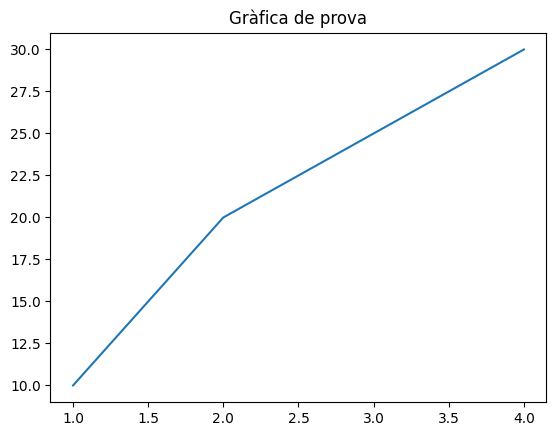

In [4]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Gràfica de prova")
plt.show()

In [ ]:
3. ReportLab
Funcionalitat:
És una llibreria per generar documents PDF de manera programada. És ideal per crear informes o resums de dades amb gràfiques, taules i text formatat.

Prova realitzada (exemple):

In [9]:
from reportlab.pdfgen import canvas

# Crear el fitxer PDF
c = canvas.Canvas("informe.pdf")

# Afegir text a les coordenades (x, y) dins del PDF
c.drawString(100, 750, "Informe generat automàticament")

# Afegir més text o elements si cal
c.drawString(100, 730, "Aquesta és una línia addicional de text.")

# Desar el PDF
c.save()


In [ ]:
Proposta final
Eines seleccionades:
Per a l'aplicació demanada, utilitzarem una combinació de Pandas, Jupyter Notebook i ReportLab, per les següents raons:

Pandas: permet una manipulació eficient de dades provinents de fitxers (CSV, JSON o altres).
Jupyter Notebook: ideal per desenvolupar prototips i visualitzar gràfiques de manera interactiva.
ReportLab: es farà servir per generar un informe professional en format PDF amb el resum i gràfiques generades.

In [ ]:
Exemple d'aplicació
Càrrega i processament de dades amb Pandas:

In [11]:
import csv

# Dades d'exemple amb 20 alumnes
data = [
    ["Professor", "Alumne", "M01", "M04", "M03", "M05"],  # Capçaleres
    ["Emili", "Xavier", 7, 9, 5, 8],
    ["Mario", "Marc", 10, 3, 5, 8],
    ["Steven", "Jaume", 8, 5, 6, 4],
    ["Laura", "Carla", 6, 7, 7, 9],
    ["Josep", "David", 5, 6, 8, 7],
    ["Anna", "Eva", 9, 7, 6, 5],
    ["Marc", "Pere", 7, 9, 8, 6],
    ["Jordi", "Ricard", 8, 6, 7, 7],
    ["Marta", "Sofia", 6, 8, 6, 8],
    ["Lluís", "Joan", 5, 5, 6, 7],
    ["Silvia", "Pilar", 9, 8, 7, 8],
    ["Carles", "Andreu", 8, 6, 9, 7],
    ["Paula", "Berta", 7, 9, 6, 5],
    ["Guillem", "Oriol", 6, 7, 5, 6],
    ["Raul", "Marc", 9, 8, 9, 9],
    ["Núria", "Gemma", 6, 6, 7, 8],
    ["Xavi", "Ricardo", 7, 7, 8, 6],
    ["Júlia", "Marta", 5, 5, 6, 7],
    ["Alex", "Roger", 8, 7, 8, 6]
]

# Guardar les dades en un fitxer CSV
with open('dades_estudiants.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print("El fitxer CSV s'ha generat correctament.")


El fitxer CSV s'ha generat correctament.


In [ ]:
Visualització de dades amb Jupyter Notebook:

In [12]:
import pandas as pd

# Carregar el fitxer CSV a un DataFrame de Pandas
df = pd.read_csv('dades_estudiants.csv')

# Mostrar les primeres files per comprovar que les dades es carreguen bé
df.head(20)  # Mostra les 20 primeres files del fitxer


,Professor,Alumne,M01,M04,M03,M05
0,Emili,Xavier,7,9,5,8
1,Mario,Marc,10,3,5,8
2,Steven,Jaume,8,5,6,4
3,Laura,Carla,6,7,7,9
4,Josep,David,5,6,8,7
5,Anna,Eva,9,7,6,5
6,Marc,Pere,7,9,8,6
7,Jordi,Ricard,8,6,7,7
8,Marta,Sofia,6,8,6,8
9,Lluís,Joan,5,5,6,7


In [ ]:
Exercici 5

Un cop tractades les dades introduïdes via fitxer caldrà investigar la llibreria que hageu triat i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l'àmbit del problema una sèrie de dades transformades obtingudes corresponents a, (s’haurà de adequar a les vostres dades però per a que
tingueu algun exemple).
Ex.
● La mitjana de nota final de cada alumne
● La mitjana de nota final de tots els alumnes en conjunts.
● Percentatges d&#39;aprovats i suspesos
● Notes més baixes o més altes.
● Algun altre que creieu interesant.

Com a restricció caldrà com a mínim generar cinc resultats coherents amb un procés
d’avaluació.

In [1]:
import pandas as pd

# Carregar el fitxer CSV a un DataFrame
df = pd.read_csv('dades_estudiants.csv')

# Afegir una columna de mitjana per a cada alumne (promig de les seves notes)
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# 1. Mitjana de nota final de cada alumne
print("Mitjana de cada alumne:")
print(df[['Alumne', 'Mitjana']])

# 2. Mitjana de la nota final de tots els alumnes
mitjana_general = df['Mitjana'].mean()
print(f"\nMitjana de la nota final de tots els alumnes: {mitjana_general:.2f}")

# 3. Percentatge d'aprovats (nota >= 5) i suspesos
aprovats = len(df[df['Mitjana'] >= 5])
suspesos = len(df[df['Mitjana'] < 5])
total = len(df)

percentatge_aprovats = (aprovats / total) * 100
percentatge_suspesos = (suspesos / total) * 100

print(f"\nPercentatge d'aprovats: {percentatge_aprovats:.2f}%")
print(f"Percentatge de suspesos: {percentatge_suspesos:.2f}%")

# 4. Notes més baixes i més altes per a cada alumne
df['Nota_més_baixa'] = df[['M01', 'M04', 'M03', 'M05']].min(axis=1)
df['Nota_més_alta'] = df[['M01', 'M04', 'M03', 'M05']].max(axis=1)

print("\nNotes més baixes i més altes per alumne:")
print(df[['Alumne', 'Nota_més_baixa', 'Nota_més_alta']])

# 5. Desviació estàndard de les notes de cada alumne
df['Desviacio_estandard'] = df[['M01', 'M04', 'M03', 'M05']].std(axis=1)
print("\nDesviació estàndard de les notes de cada alumne:")
print(df[['Alumne', 'Desviacio_estandard']])

# 6. Alumne amb la millor mitjana i l'alumne amb la pitjor mitjana
millor_alumne = df.loc[df['Mitjana'].idxmax()]
pitjor_alumne = df.loc[df['Mitjana'].idxmin()]

print(f"\nMillor alumne: {millor_alumne['Alumne']} amb una mitjana de {millor_alumne['Mitjana']:.2f}")
print(f"Pitjor alumne: {pitjor_alumne['Alumne']} amb una mitjana de {pitjor_alumne['Mitjana']:.2f}")


Mitjana de cada alumne:
     Alumne  Mitjana
0    Xavier     7.25
1      Marc     6.50
2     Jaume     5.75
3     Carla     7.25
4     David     6.50
5       Eva     6.75
6      Pere     7.50
7    Ricard     7.00
8     Sofia     7.00
9      Joan     5.75
10    Pilar     8.00
11   Andreu     7.50
12    Berta     6.75
13    Oriol     6.00
14     Marc     8.75
15    Gemma     6.75
16  Ricardo     7.00
17    Marta     5.75
18    Roger     7.25

Mitjana de la nota final de tots els alumnes: 6.89

Percentatge d'aprovats: 100.00%
Percentatge de suspesos: 0.00%

Notes més baixes i més altes per alumne:
     Alumne  Nota_més_baixa  Nota_més_alta
0    Xavier               5              9
1      Marc               3             10
2     Jaume               4              8
3     Carla               6              9
4     David               5              8
5       Eva               5              9
6      Pere               6              9
7    Ricard               6              8
8     Sofia

In [ ]:
Exercici 6

De la mateixa manera que a l'exercici 5 caldrà investigar una llibreria per a realitzar  gràfics de dades visuals i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l''àmbit del problema. 

Com a restricció caldrà com a mínim generar 4 gràfiques

coherents.  Es pot utilitzar la llibreria python matploit

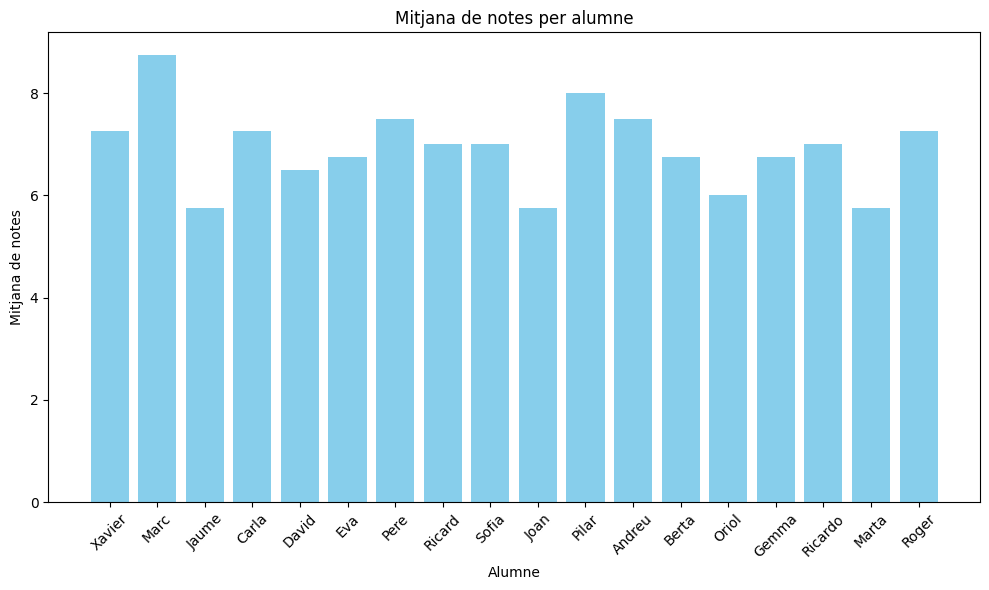

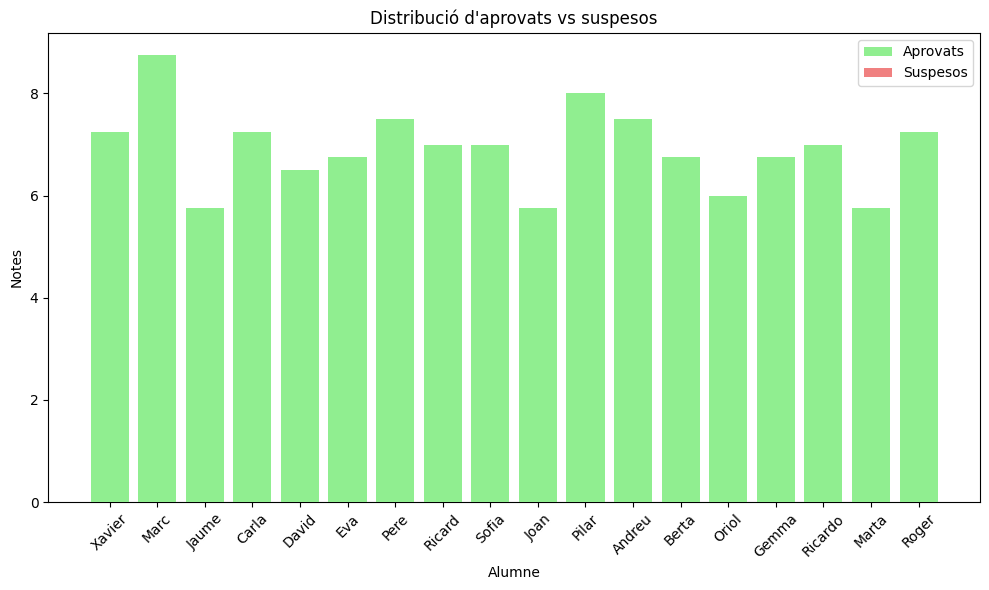

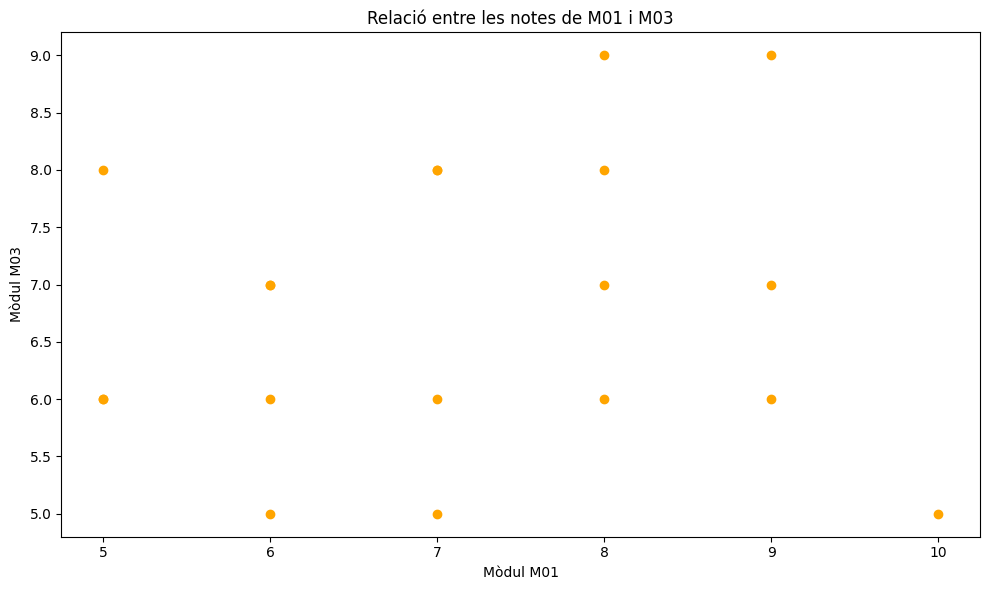

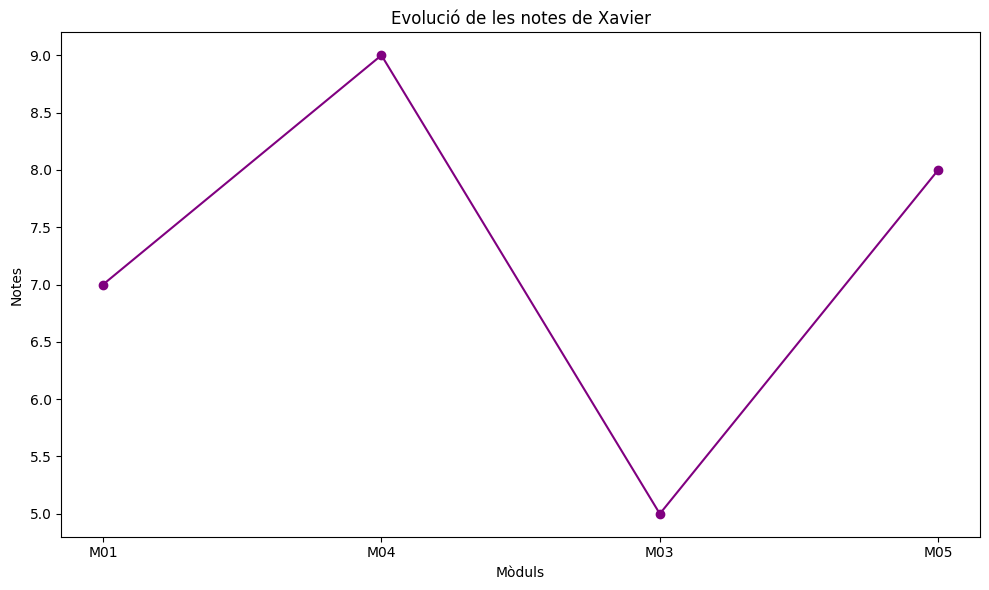

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar el fitxer CSV a un DataFrame
df = pd.read_csv('dades_estudiants.csv')

# Afegir una columna de mitjana per a cada alumne (promig de les seves notes)
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# Gràfic 1: Gràfic de barres per mostrar la mitjana de cada alumne
plt.figure(figsize=(10, 6))
plt.bar(df['Alumne'], df['Mitjana'], color='skyblue')
plt.xlabel('Alumne')
plt.ylabel('Mitjana de notes')
plt.title('Mitjana de notes per alumne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gràfic 2: Gràfic de barres apilades per mostrar aprovats vs suspesos
aprovats = df[df['Mitjana'] >= 5]
suspesos = df[df['Mitjana'] < 5]

# Gràfic de barres apilades
plt.figure(figsize=(10, 6))
plt.bar(df['Alumne'], df['Mitjana'], label="Aprovats", color='lightgreen', zorder=10)
plt.bar(df['Alumne'], [5] * len(df), label="Suspesos", color='lightcoral', zorder=5)
plt.xlabel('Alumne')
plt.ylabel('Notes')
plt.title('Distribució d\'aprovats vs suspesos')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Gràfic 3: Gràfic de dispersió per mostrar la relació entre M01 i M02
plt.figure(figsize=(10, 6))
plt.scatter(df['M01'], df['M03'], color='orange')
plt.xlabel('Mòdul M01')
plt.ylabel('Mòdul M03')
plt.title('Relació entre les notes de M01 i M03')
plt.tight_layout()
plt.show()

# Gràfic 4: Gràfic de línies per mostrar l'evolució de les notes d\'un alumne (ex: Xavier)
xavier = df[df['Alumne'] == 'Xavier']

plt.figure(figsize=(10, 6))
plt.plot(['M01', 'M04', 'M03', 'M05'], xavier[['M01', 'M04', 'M03', 'M05']].values.flatten(), marker='o', color='purple')
plt.xlabel('Mòduls')
plt.ylabel('Notes')
plt.title('Evolució de les notes de Xavier')
plt.tight_layout()
plt.show()


In [ ]:
Exercici 7

Caldrà fer un informe de les següents parts de la pràctica 5.
1- Un informe de la part de logging amb el codi que s’ha utilitzat i els exemples
d’utilització i resultats.

In [3]:
import logging
import logging.config
import time

# Càrrega de la configuració des del fitxer 'logging.conf'
logging.config.fileConfig('logging.conf')

# Crear loggers
logger = logging.getLogger('ejemplofichero')
csv_logger = logging.getLogger('csvlogger')

# Bucle principal
while True:
    try:
        logger.debug('Missatge de depuració cada dos segons')
        logger.info('Missatge informatiu cada dos segons')
        csv_logger.info('Registre en format CSV cada dos segons')
        time.sleep(2)  # Pausa de 2 segons
    except KeyboardInterrupt:
        logger.error('El programa s\'ha interromput manualment')
        break


2024-11-22 18:18:46,228 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 18:18:46,228 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 18:18:46,229 - csvlogger - INFO - Registre en format CSV cada dos segons
2024-11-22 18:18:48,230 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 18:18:48,230 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-22 18:18:48,231 - csvlogger - INFO - Registre en format CSV cada dos segons
2024-11-22 18:18:50,176 - ejemplofichero - ERROR - El programa s'ha interromput manualment
2024-11-22 18:18:50,176 - ejemplofichero - ERROR - El programa s'ha interromput manualment


In [ ]:
2- Un informe de la part del tractament de dades, que s’expliqui cada part que s’ha
utilitzat així com les gràfiques que es mostren.

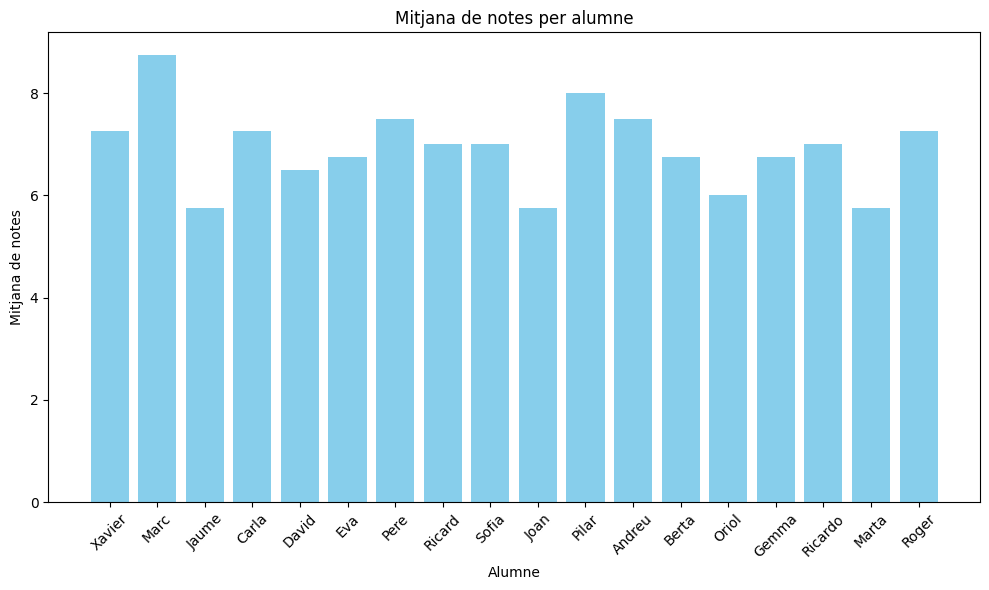

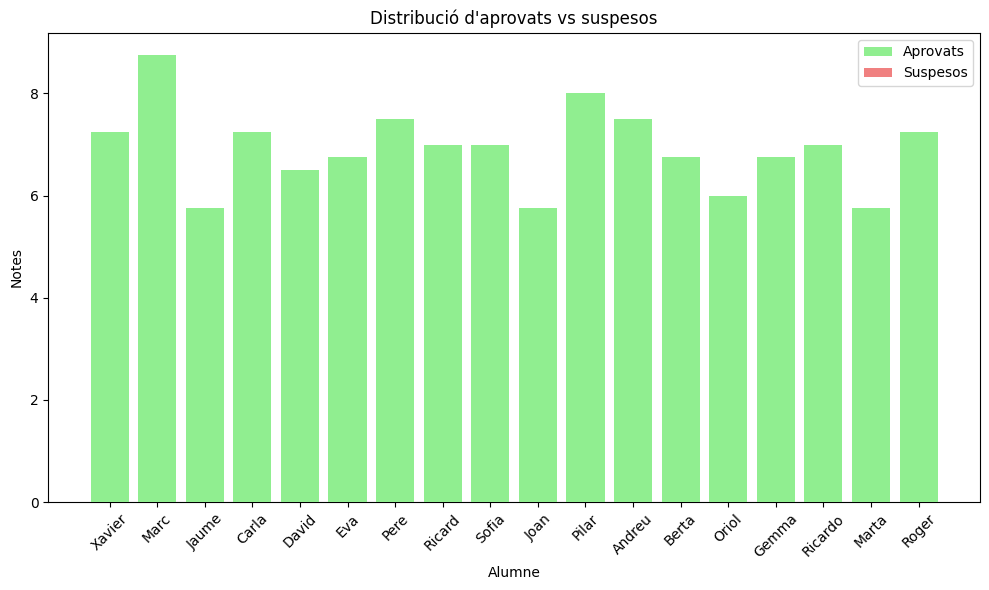

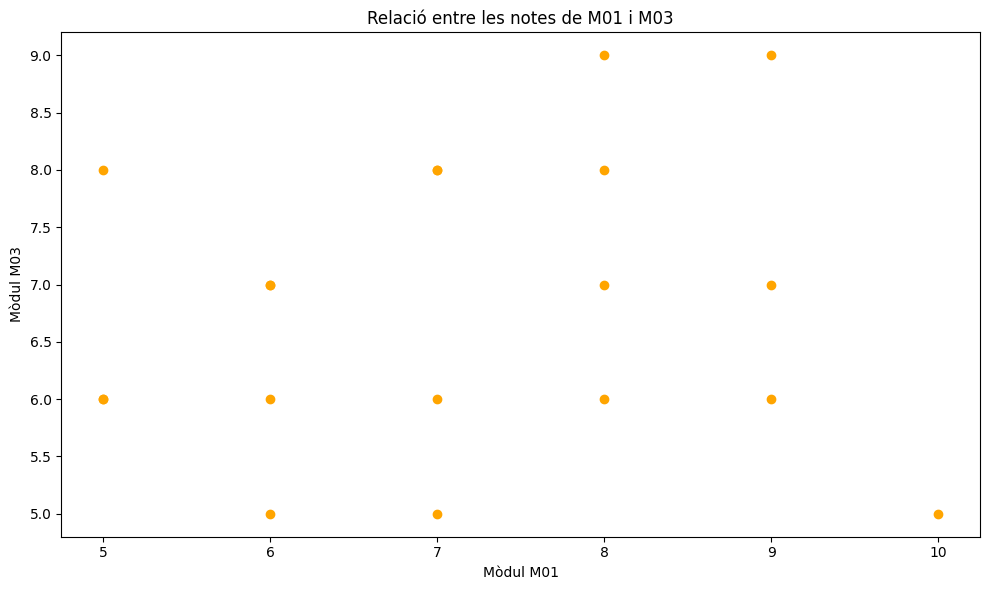

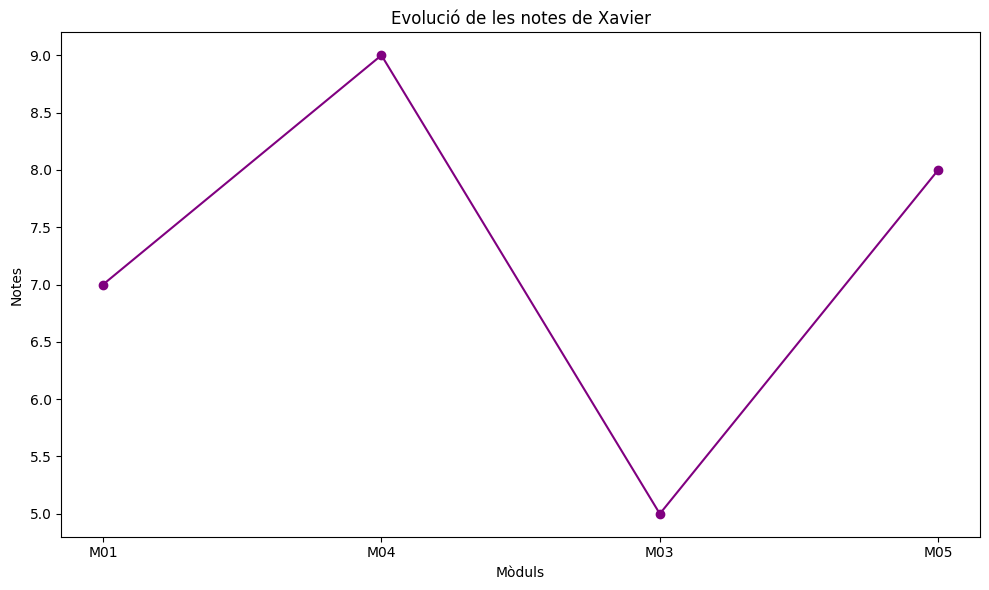

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar el fitxer CSV a un DataFrame de Pandas
df = pd.read_csv('dades_estudiants.csv')

# Afegir una columna de mitjana per a cada alumne (promig de les seves notes)
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# 1. Gràfic de barres per mostrar la mitjana de cada alumne
plt.figure(figsize=(10, 6))
plt.bar(df['Alumne'], df['Mitjana'], color='skyblue')
plt.xlabel('Alumne')
plt.ylabel('Mitjana de notes')
plt.title('Mitjana de notes per alumne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Gràfic de barres apilades per mostrar aprovats vs suspesos
aprovats = len(df[df['Mitjana'] >= 5])
suspesos = len(df[df['Mitjana'] < 5])
total = len(df)

percentatge_aprovats = (aprovats / total) * 100
percentatge_suspesos = (suspesos / total) * 100

plt.figure(figsize=(10, 6))
plt.bar(df['Alumne'], df['Mitjana'], label="Aprovats", color='lightgreen', zorder=10)
plt.bar(df['Alumne'], [5] * len(df), label="Suspesos", color='lightcoral', zorder=5)
plt.xlabel('Alumne')
plt.ylabel('Notes')
plt.title('Distribució d\'aprovats vs suspesos')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Gràfic de dispersió per mostrar la relació entre M01 i M02
plt.figure(figsize=(10, 6))
plt.scatter(df['M01'], df['M03'], color='orange')
plt.xlabel('Mòdul M01')
plt.ylabel('Mòdul M03')
plt.title('Relació entre les notes de M01 i M03')
plt.tight_layout()
plt.show()

# 4. Gràfic de línies per mostrar l'evolució de les notes d'un alumne
xavier = df[df['Alumne'] == 'Xavier']

plt.figure(figsize=(10, 6))
plt.plot(['M01', 'M04', 'M03', 'M05'], xavier[['M01', 'M04', 'M03', 'M05']].values.flatten(), marker='o', color='purple')
plt.xlabel('Mòduls')
plt.ylabel('Notes')
plt.title('Evolució de les notes de Xavier')
plt.tight_layout()
plt.show()
